<a href="https://colab.research.google.com/github/Niloofar-SecML/CNN/blob/main/OptimizationByTenser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

In [3]:
tf.__version__

'2.18.0'

In [4]:
train_dataset = h5py.File('/content/drive/MyDrive/Neural Network/train_signs.h5', "r")
test_dataset = h5py.File('/content/drive/MyDrive/Neural Network/test_signs.h5', "r")

In [5]:
x_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_x'])
y_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_y'])

x_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_x'])
y_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_y'])

In [6]:
type(x_train)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [7]:
print(x_train.element_spec)

TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None)


In [8]:
print(next(iter(x_train)))

tf.Tensor(
[[[227 220 214]
  [227 221 215]
  [227 222 215]
  ...
  [232 230 224]
  [231 229 222]
  [230 229 221]]

 [[227 221 214]
  [227 221 215]
  [228 221 215]
  ...
  [232 230 224]
  [231 229 222]
  [231 229 221]]

 [[227 221 214]
  [227 221 214]
  [227 221 215]
  ...
  [232 230 224]
  [231 229 223]
  [230 229 221]]

 ...

 [[119  81  51]
  [124  85  55]
  [127  87  58]
  ...
  [210 211 211]
  [211 212 210]
  [210 211 210]]

 [[119  79  51]
  [124  84  55]
  [126  85  56]
  ...
  [210 211 210]
  [210 211 210]
  [209 210 209]]

 [[119  81  51]
  [123  83  55]
  [122  82  54]
  ...
  [209 210 210]
  [209 210 209]
  [208 209 209]]], shape=(64, 64, 3), dtype=uint8)


In [9]:
unique_labels = set()
for element in y_train:
    unique_labels.add(element.numpy())
print(unique_labels)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}


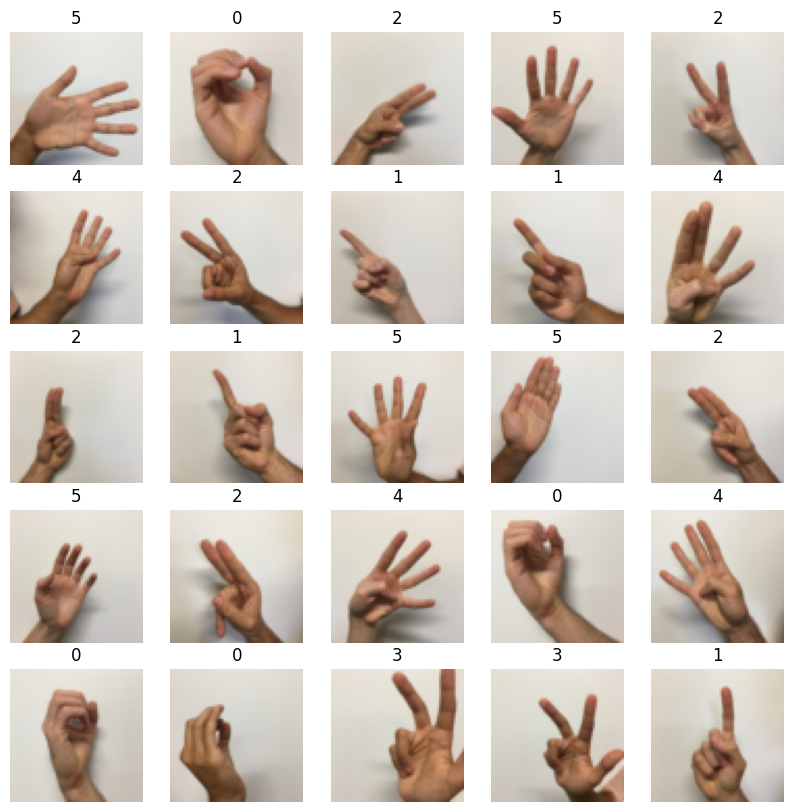

In [10]:
images_iter = iter(x_train)
labels_iter = iter(y_train)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(next(images_iter).numpy().astype("uint8"))
    plt.title(next(labels_iter).numpy().astype("uint8"))
    plt.axis("off")

In [11]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, )
    and normalize its components.

    Arguments
    image - Tensor.

    Returns:
    result -- Transformed tensor
    """
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1,])
    return image

In [12]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

In [13]:
new_train.element_spec

TensorSpec(shape=(12288,), dtype=tf.float32, name=None)

In [14]:
print(next(iter(new_train)))

tf.Tensor([0.8901961  0.8627451  0.8392157  ... 0.8156863  0.81960785 0.81960785], shape=(12288,), dtype=float32)


In [15]:
#linear
def linear_function():


    np.random.seed(1)

    X = tf.constant(np.random.randn(3, 1), dtype=tf.float32, name="X")
    W = tf.constant(np.random.randn(4, 3), dtype=tf.float32, name="W")
    b = tf.constant(np.random.randn(4, 1), dtype=tf.float32, name="b")
    Y = tf.add(tf.matmul(W, X), b, name="Y")
    return Y

In [16]:
result = linear_function()
print(result)

assert type(result) == EagerTensor, "Use the TensorFlow API"
assert np.allclose(result, [[-2.15657382], [ 2.95891446], [-1.08926781], [-0.84538042]]), "Error"
print("\033[92mAll test passed")

tf.Tensor(
[[-2.1565738]
 [ 2.9589148]
 [-1.0892676]
 [-0.8453805]], shape=(4, 1), dtype=float32)
All test passed


In [18]:
#sigmoid
def sigmoid(z):

    z = tf.cast(z, tf.float32)
    a = tf.keras.activations.sigmoid(z)

    return a

In [22]:
# Evaluate sigmoid at some points
result = sigmoid(-1)
print("type: " + str(type(result)))
print("dtype: " + str(result.dtype))
print("sigmoid(-1) = " + str(result))
print("sigmoid(0) = " + str(sigmoid(0.0)))
print("sigmoid(12) = " + str(sigmoid(12)))

# Define the test function
def sigmoid_test(target):
    result = target(0)
    assert isinstance(result, EagerTensor), "Result is not an EagerTensor"
    assert result.dtype == tf.float32, "Result dtype is not tf.float32"

    assert np.isclose(float(sigmoid(0)), 0.5, atol=1e-6), "Error at sigmoid(0)"
    assert np.isclose(float(sigmoid(-1)), 0.26894143, atol=1e-6), "Error at sigmoid(-1)"
    assert np.isclose(float(sigmoid(12)), 0.9999939, atol=1e-6), "Error at sigmoid(12)"

    print("\033[92mAll tests passed!")

# Run the test
sigmoid_test(sigmoid)

type: <class 'tensorflow.python.framework.ops.EagerTensor'>
dtype: <dtype: 'float32'>
sigmoid(-1) = tf.Tensor(0.26894143, shape=(), dtype=float32)
sigmoid(0) = tf.Tensor(0.5, shape=(), dtype=float32)
sigmoid(12) = tf.Tensor(0.99999386, shape=(), dtype=float32)
All tests passed!


In [23]:
def one_hot_matrix(label, C=6):
    one_hot = tf.one_hot(label, depth=C, axis=0)

    # Reshape the tensor into a one-dimensional array
    one_hot = tf.reshape(one_hot, shape=[C, ])

    return one_hot

In [24]:
def one_hot_matrix_test(target):
    label = tf.constant(1)
    C = 4
    result = target(label, C)
    print("Test 1:",result)
    assert result.shape[0] == C, "Use the parameter C"
    assert np.allclose(result, [0., 1. ,0., 0.] ), "Wrong output. Use tf.one_hot"
    label_2 = [2]
    C = 5
    result = target(label_2, C)
    print("Test 2:", result)
    assert result.shape[0] == C, "Use the parameter C"
    assert np.allclose(result, [0., 0. ,1., 0., 0.] ), "Wrong output. Use tf.reshape as instructed"

    print("\033[92mAll test passed")

one_hot_matrix_test(one_hot_matrix)

Test 1: tf.Tensor([0. 1. 0. 0.], shape=(4,), dtype=float32)
Test 2: tf.Tensor([0. 0. 1. 0. 0.], shape=(5,), dtype=float32)
All test passed


In [25]:
new_y_test = y_test.map(one_hot_matrix)
new_y_train = y_train.map(one_hot_matrix)

In [26]:
print(next(iter(new_y_test)))

tf.Tensor([1. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)


In [27]:
#initialize_parameters

def initialize_parameters():

    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    W1 = tf.Variable(initializer(shape=(25, 12288)))
    b1 = tf.Variable(initializer(shape=(25, 1)))  # Use GlorotNormal for b1
    W2 = tf.Variable(initializer(shape=(12, 25)))
    b2 = tf.Variable(initializer(shape=(12, 1)))  # Use GlorotNormal for b2
    W3 = tf.Variable(initializer(shape=(6, 12)))
    b3 = tf.Variable(initializer(shape=(6, 1)))  # Use GlorotNormal for b3

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

In [28]:
def initialize_parameters_test(target):
    parameters = target()

    values = {"W1": (25, 12288),
              "b1": (25, 1),
              "W2": (12, 25),
              "b2": (12, 1),
              "W3": (6, 12),
              "b3": (6, 1)}

    for key in parameters:
        print(f"{key} shape: {tuple(parameters[key].shape)}")
        assert type(parameters[key]) == ResourceVariable, "All parameter must be created using tf.Variable"
        assert tuple(parameters[key].shape) == values[key], f"{key}: wrong shape"
        assert np.abs(np.mean(parameters[key].numpy())) < 0.5,  f"{key}: Use the GlorotNormal initializer"
        assert np.std(parameters[key].numpy()) > 0 and np.std(parameters[key].numpy()) < 1, f"{key}: Use the GlorotNormal initializer"

    print("\033[92mAll test passed")

initialize_parameters_test(initialize_parameters)

W1 shape: (25, 12288)
b1 shape: (25, 1)
W2 shape: (12, 25)
b2 shape: (12, 1)
W3 shape: (6, 12)
b3 shape: (6, 1)
All test passed


In [29]:
parameters = initialize_parameters()

In [31]:
#forward_propagation

def forward_propagation(X, parameters):

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.linalg.matmul(W1, X)
    Z1 = tf.math.add(Z1, b1)

    # Apply ReLU activation to Z1 to get A1
    A1 = tf.keras.activations.relu(Z1)

    # Second linear transformation: Z2 = W2 * A1 + b2
    Z2 = tf.linalg.matmul(W2, A1)
    Z2 = tf.math.add(Z2, b2)

    # Apply ReLU activation to Z2 to get A2
    A2 = tf.keras.activations.relu(Z2)

    # Third linear transformation: Z3 = W3 * A2 + b3
    Z3 = tf.linalg.matmul(W3, A2)
    Z3 = tf.math.add(Z3, b3)


    return Z3

In [32]:
def forward_propagation_test(target, examples):
    minibatches = examples.batch(2)
    parametersk = initialize_parameters()
    W1 = parametersk['W1']
    b1 = parametersk['b1']
    W2 = parametersk['W2']
    b2 = parametersk['b2']
    W3 = parametersk['W3']
    b3 = parametersk['b3']
    index = 0
    minibatch = list(minibatches)[0]
    with tf.GradientTape() as tape:
        forward_pass = target(tf.transpose(minibatch), parametersk)
        print(forward_pass)
        fake_cost = tf.reduce_mean(forward_pass - np.ones((6,2)))

        assert type(forward_pass) == EagerTensor, "Your output is not a tensor"
        assert forward_pass.shape == (6, 2), "Last layer must use W3 and b3"
        assert np.allclose(forward_pass,
                           [[-0.13430887,  0.14086473],
                            [ 0.21588647, -0.02582335],
                            [ 0.7059658,   0.6484556 ],
                            [-1.1260961,  -0.9329492 ],
                            [-0.20181894, -0.3382722 ],
                            [ 0.9558965,   0.94167566]]), "Output does not match"
    index = index + 1
    trainable_variables = [W1, b1, W2, b2, W3, b3]
    grads = tape.gradient(fake_cost, trainable_variables)
    assert not(None in grads), "Wrong gradients. It could be due to the use of tf.Variable whithin forward_propagation"
    print("\033[92mAll test passed")

forward_propagation_test(forward_propagation, new_train)

tf.Tensor(
[[-0.13430879  0.14086479]
 [ 0.21588641 -0.02582344]
 [ 0.7059657   0.6484557 ]
 [-1.1260961  -0.9329493 ]
 [-0.20181888 -0.33827227]
 [ 0.95589626  0.94167554]], shape=(6, 2), dtype=float32)
All test passed


In [33]:
#compute_total_loss

def compute_total_loss(logits, labels):

    # Transpose logits and labels
    logits = tf.transpose(logits)
    labels = tf.transpose(labels)

    # Compute categorical cross-entropy loss with from_logits=True
    losses = tf.keras.losses.categorical_crossentropy(labels, logits, from_logits=True)

    # Sum the losses
    total_loss = tf.reduce_sum(losses)
    return total_loss

In [34]:
def compute_total_loss_test(target, Y):
    pred = tf.constant([[ 2.4048107,   5.0334096 ],
             [-0.7921977,  -4.1523376 ],
             [ 0.9447198,  -0.46802214],
             [ 1.158121,    3.9810789 ],
             [ 4.768706,    2.3220146 ],
             [ 6.1481323,   3.909829  ]])
    minibatches = Y.batch(2)
    for minibatch in minibatches:
        result = target(pred, tf.transpose(minibatch))
        break

    print("Test 1: ", result)
    assert(type(result) == EagerTensor), "Use the TensorFlow API"
    assert (np.abs(result - (0.50722074 + 1.1133534) / 2.0) < 1e-7), "Test 1 does not match. Did you get the reduce sum of your loss functions?"

    ### Test 2
    labels = tf.constant([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
    logits = tf.constant([[1., 0., 0.], [1., 0., 0.], [1., 0., 0.]])

    result = compute_total_loss(logits, labels)
    print("Test 2: ", result)
    assert np.allclose(result, 3.295837 ), "Test 2 does not match."

    print("\033[92mAll test passed")

compute_total_loss_test(compute_total_loss, new_y_train )

Test 1:  tf.Tensor(0.810287, shape=(), dtype=float32)
Test 2:  tf.Tensor(3.295837, shape=(), dtype=float32)
All test passed


In [43]:
#train model
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):


    costs = []                                        # To keep track of the cost
    train_acc = []
    test_acc = []

    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # The CategoricalAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()

    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))

    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()

    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)


    # Do the training loop
    for epoch in range(num_epochs):

        epoch_total_loss = 0.

        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_state()

        for (minibatch_X, minibatch_Y) in minibatches:

            with tf.GradientTape() as tape:
                # 1. predict
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)

                # 2. loss
                minibatch_total_loss = compute_total_loss(Z3, tf.transpose(minibatch_Y))

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, tf.transpose(Z3))

            trainable_variables = [W1, b1, W2, b2, W3, b3]
            grads = tape.gradient(minibatch_total_loss, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_total_loss += minibatch_total_loss

        # We divide the epoch total loss over the number of samples
        epoch_total_loss /= m

        # Print the cost every 10 epochs
        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_total_loss))
            print("Train accuracy:", train_accuracy.result())

            # We evaluate the test set every 10 epochs to avoid computational overhead
            for (minibatch_X, minibatch_Y) in test_minibatches:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                test_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            print("Test_accuracy:", test_accuracy.result())

            costs.append(epoch_total_loss)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_state()


    return parameters, costs, train_acc, test_acc

In [44]:
parameters, costs, train_acc, test_acc = model(new_train, new_y_train, new_test, new_y_test, num_epochs=100)

Cost after epoch 0: 1.830244
Train accuracy: tf.Tensor(0.17037037, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.2, shape=(), dtype=float32)
Cost after epoch 10: 1.552391
Train accuracy: tf.Tensor(0.35925925, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.30833334, shape=(), dtype=float32)
Cost after epoch 20: 1.347617
Train accuracy: tf.Tensor(0.5074074, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.44166666, shape=(), dtype=float32)
Cost after epoch 30: 1.162812
Train accuracy: tf.Tensor(0.61388886, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.51666665, shape=(), dtype=float32)
Cost after epoch 40: 1.035599
Train accuracy: tf.Tensor(0.65833336, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.55833334, shape=(), dtype=float32)
Cost after epoch 50: 0.946474
Train accuracy: tf.Tensor(0.6814815, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.6166667, shape=(), dtype=float32)
Cost after epoch 60: 0.879669
Train accuracy: tf.Tensor(0.70555556, shape=(), dty

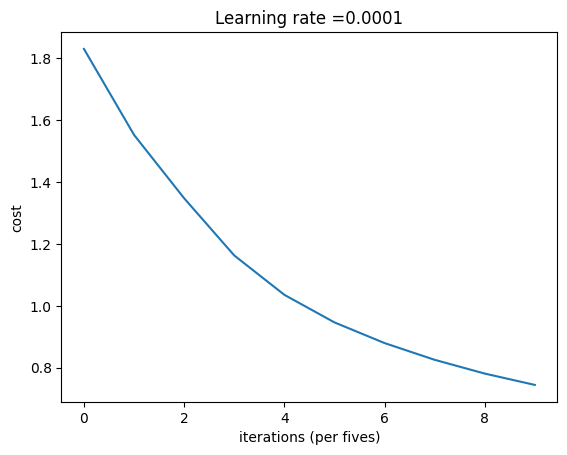

In [45]:
# Plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()

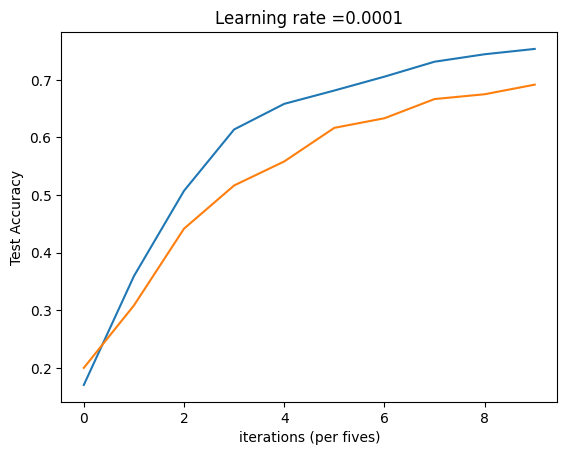

In [46]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()